<div style="display: flex;">
    <div style="flex: 1;">
        <h1>Cómputo de Alto Rendimiento </h1>
        <h2>Actividad 5: Ejercicios de MPI y Map-reduce</h2>
        <p><strong>Nombre:</strong> David Aaron Ramirez Olmeda<br>
        <strong>Programa:</strong> Maestría en Ciencia de Datos e Información</p>
    </div>
    <img src="https://pbs.twimg.com/profile_images/1674912653049774081/Lj1u22X8_400x400.jpg" alt="Imagen de Portada" width="170" height="170">
</div>

**Introducción:**

En este conjunto de actividades, trabajamos en la implementación de códigos paralelos utilizando el paradigma Map-Reduce en un entorno de programación paralela con MPI (Message Passing Interface). Estos códigos se desarrollaron para realizar tareas específicas, como calcular el valor de π, realizar multiplicación de matrices y vectores, y contar palabras en archivos de texto. Utilizamos un enfoque paralelo para dividir el trabajo entre múltiples procesos y luego reunir los resultados. Este enfoque tiene como objetivo mejorar el rendimiento y la eficiencia al aprovechar la capacidad de procesamiento distribuido en sistemas paralelos.

1. **Cálculo Paralelo de π Utilizando MPI**

In [ ]:
from mpi4py import MPI
import time

start_time_parallel = time.time()
# Inicializa MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Define el número de divisiones para la aproximación
precision_factor = 1000000  

# Calcula el rango de trabajo para cada proceso
chunk_size = precision_factor // size
start = rank * chunk_size
end = (rank + 1) * chunk_size

# Calcula la suma de Riemann en el rango asignado
partial_sum = 0.0
for i in range(start, end):
    x = (i + 0.5) / precision_factor
    partial_sum += 4.0 / (1.0 + x**2)

# Realiza la reducción para obtener el resultado global
total_sum = comm.reduce(partial_sum, op=MPI.SUM, root=0)

# En el proceso 0, muestra el resultado
if rank == 0:
    pi_parallel = total_sum / precision_factor
    end_time_parallel = time.time()
    print(f"Valor aproximado de π (paralelo): {pi_parallel}")
    print(f"Tiempo de ejecución (paralelo): {end_time_parallel - start_time_parallel} segundos")

start_time_serial = time.time()

# Código serial
precision_factor = 1000000
partial_sum = 0.0
for i in range(precision_factor):
    x = (i + 0.5) / precision_factor
    partial_sum += 4.0 / (1.0 + x**2)
pi_serial = partial_sum / precision_factor

# Registro del tiempo de finalización para la versión serial
end_time_serial = time.time()

print(f"Valor aproximado de π (serial): {pi_serial}")
print(f"Tiempo de ejecución (serial): {end_time_serial - start_time_serial} segundos")

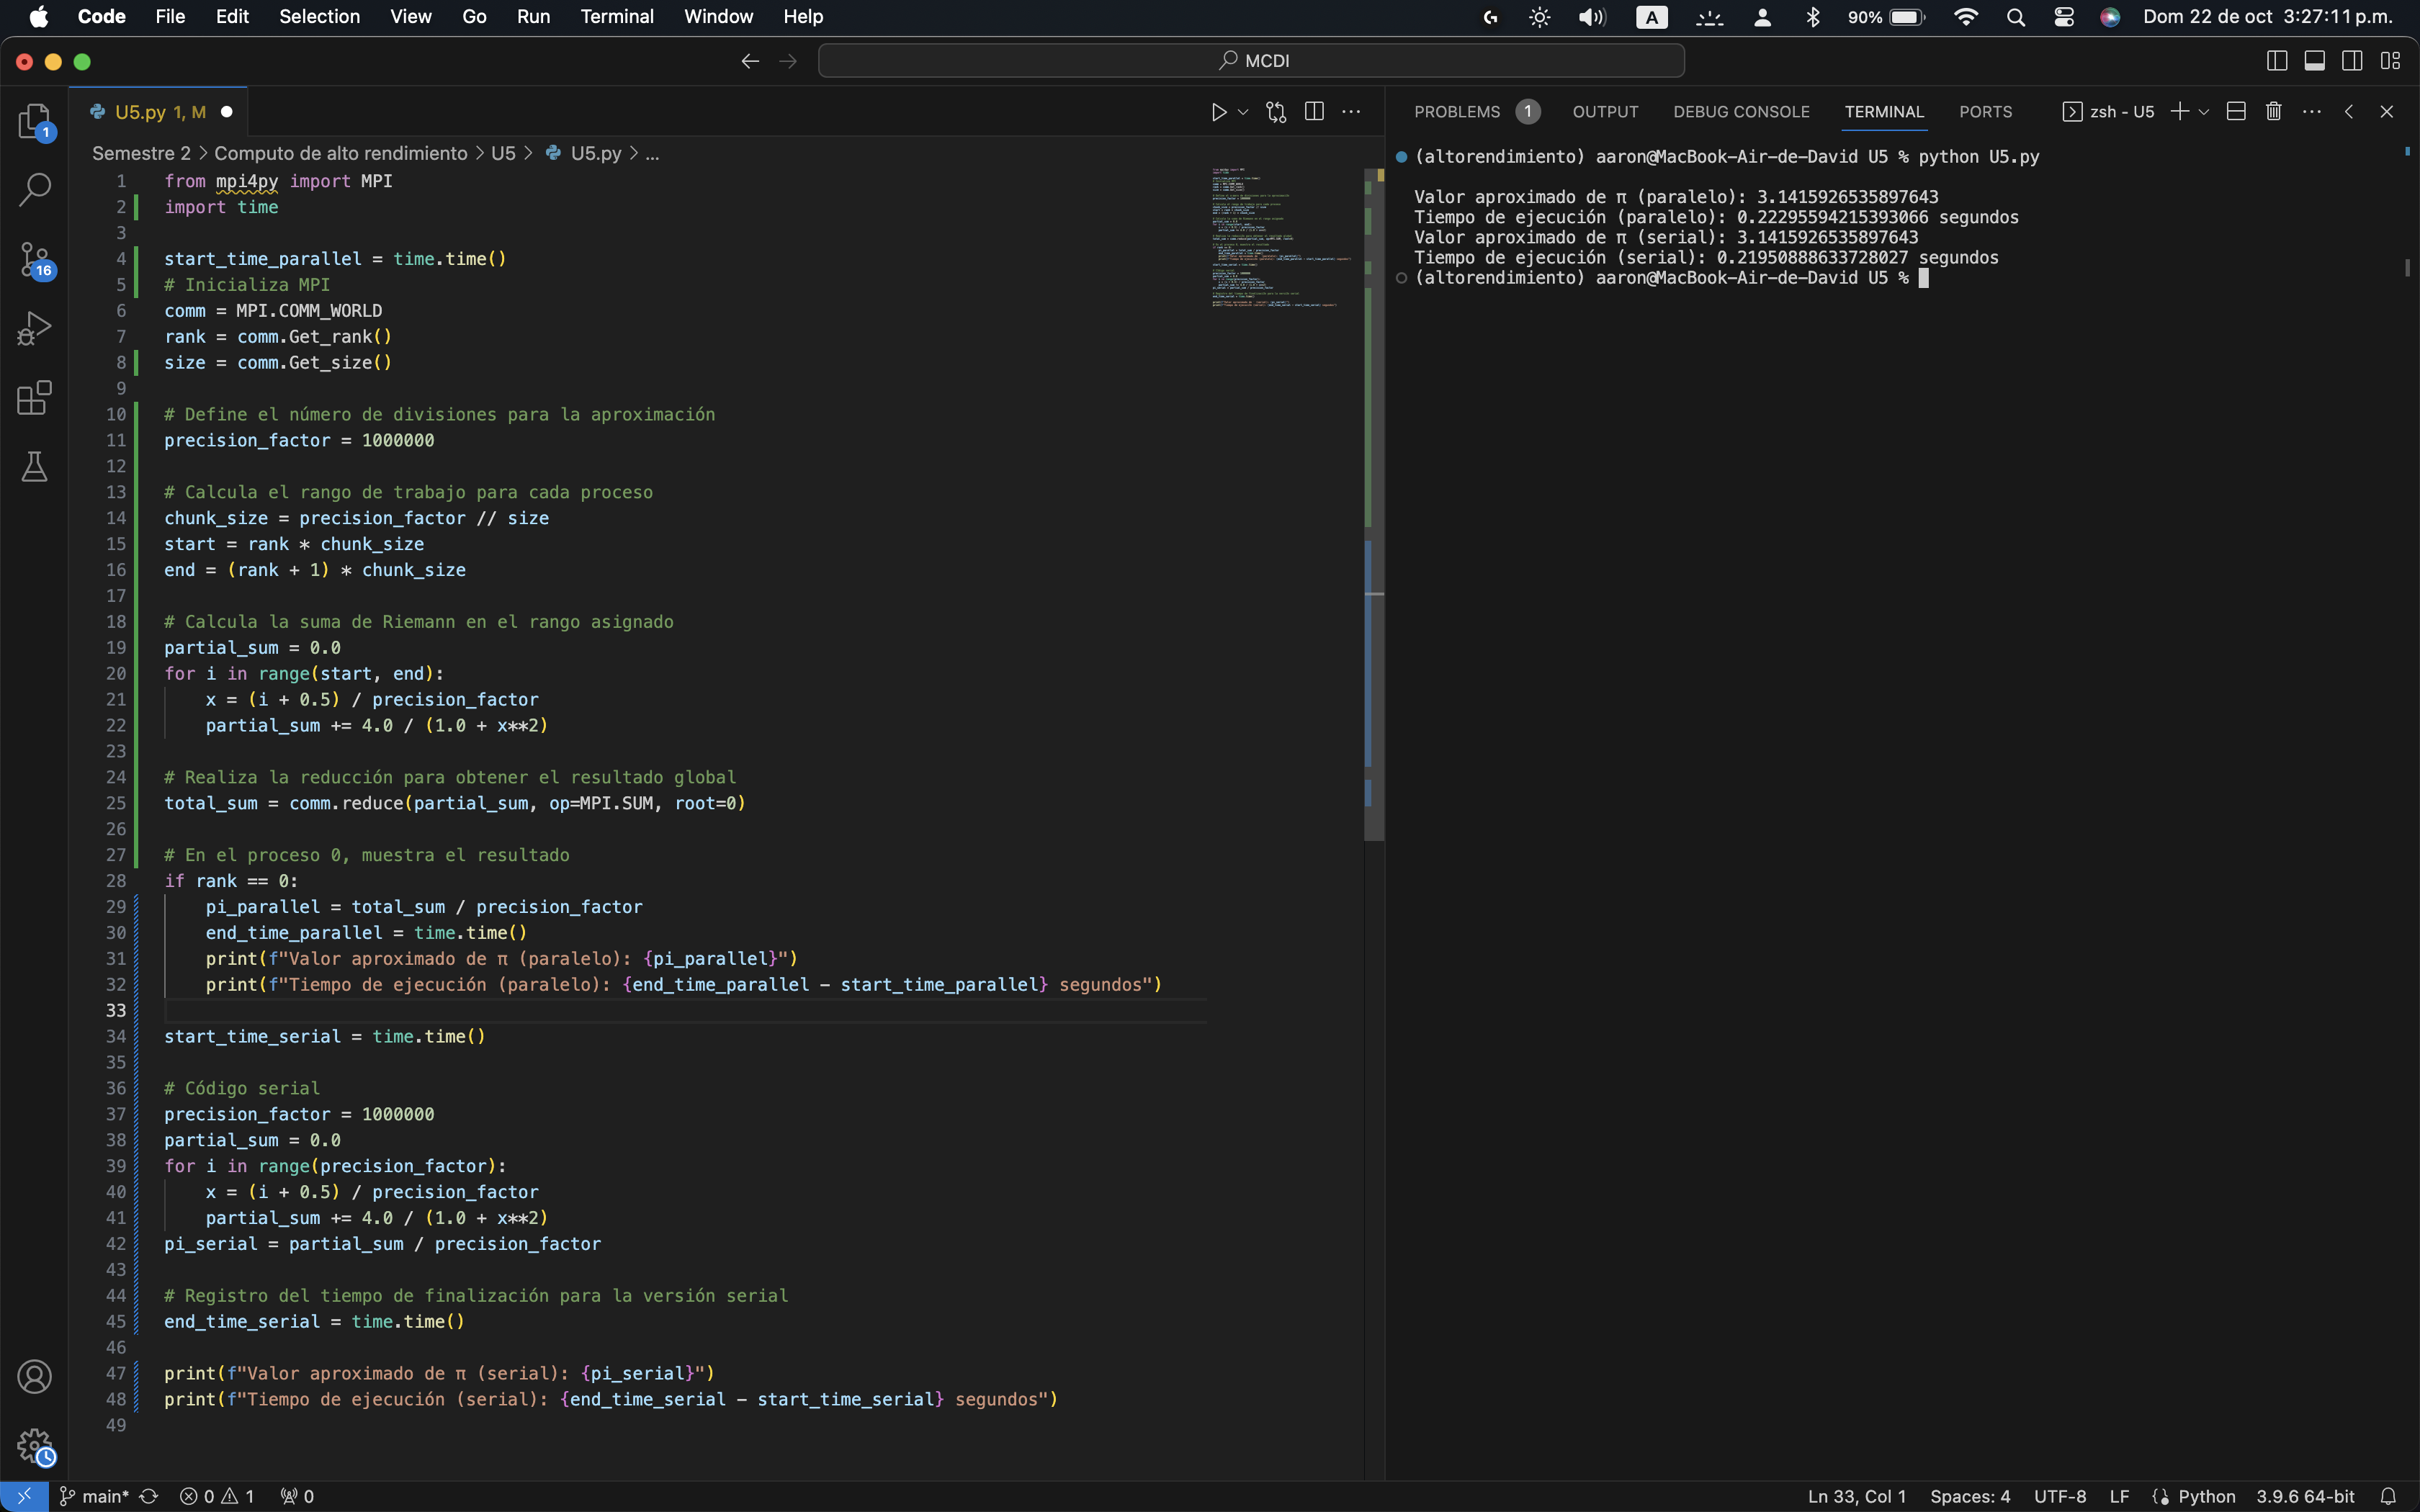

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/Users/aaron/Desktop/1.png')
display(img)

2. **Programación Paralela de Envío y Recepción de Mensajes con MPI**

In [ ]:
from mpi4py import MPI
import time

# Registro del tiempo de inicio para la versión paralela
start_time_parallel = time.time()

# Inicializa MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Definir el mensaje inicial
message = f"Mensaje de proceso {rank}"

# Enviar y recibir mensajes encadenados
for dest in range(1, size):
    if rank == dest:
        received_message = comm.recv(source=rank - 1)
        print(f"Soy el proceso {rank} y he recibido: {received_message}")
    elif rank == dest - 1:
        comm.send(message, dest=dest)

# Registro del tiempo de finalización para la versión paralela
end_time_parallel = time.time()

# Comparación de métricas de desempeño
if rank == 0:
    print(f"Tiempo de ejecución (paralelo): {end_time_parallel - start_time_parallel} segundos")

# Registro del tiempo de inicio para la versión serial
start_time_serial = time.time()

# Código serial
for i in range(size - 1):
    message = f"Mensaje de proceso {i}"
    print(f"Soy el proceso {i} y he recibido: {message}")

# Registro del tiempo de finalización para la versión serial
end_time_serial = time.time()

# Comparación de métricas de desempeño
if rank == 0:
    print(f"Tiempo de ejecución (serial): {end_time_serial - start_time_serial} segundos")

# Finaliza MPI
MPI.Finalize()

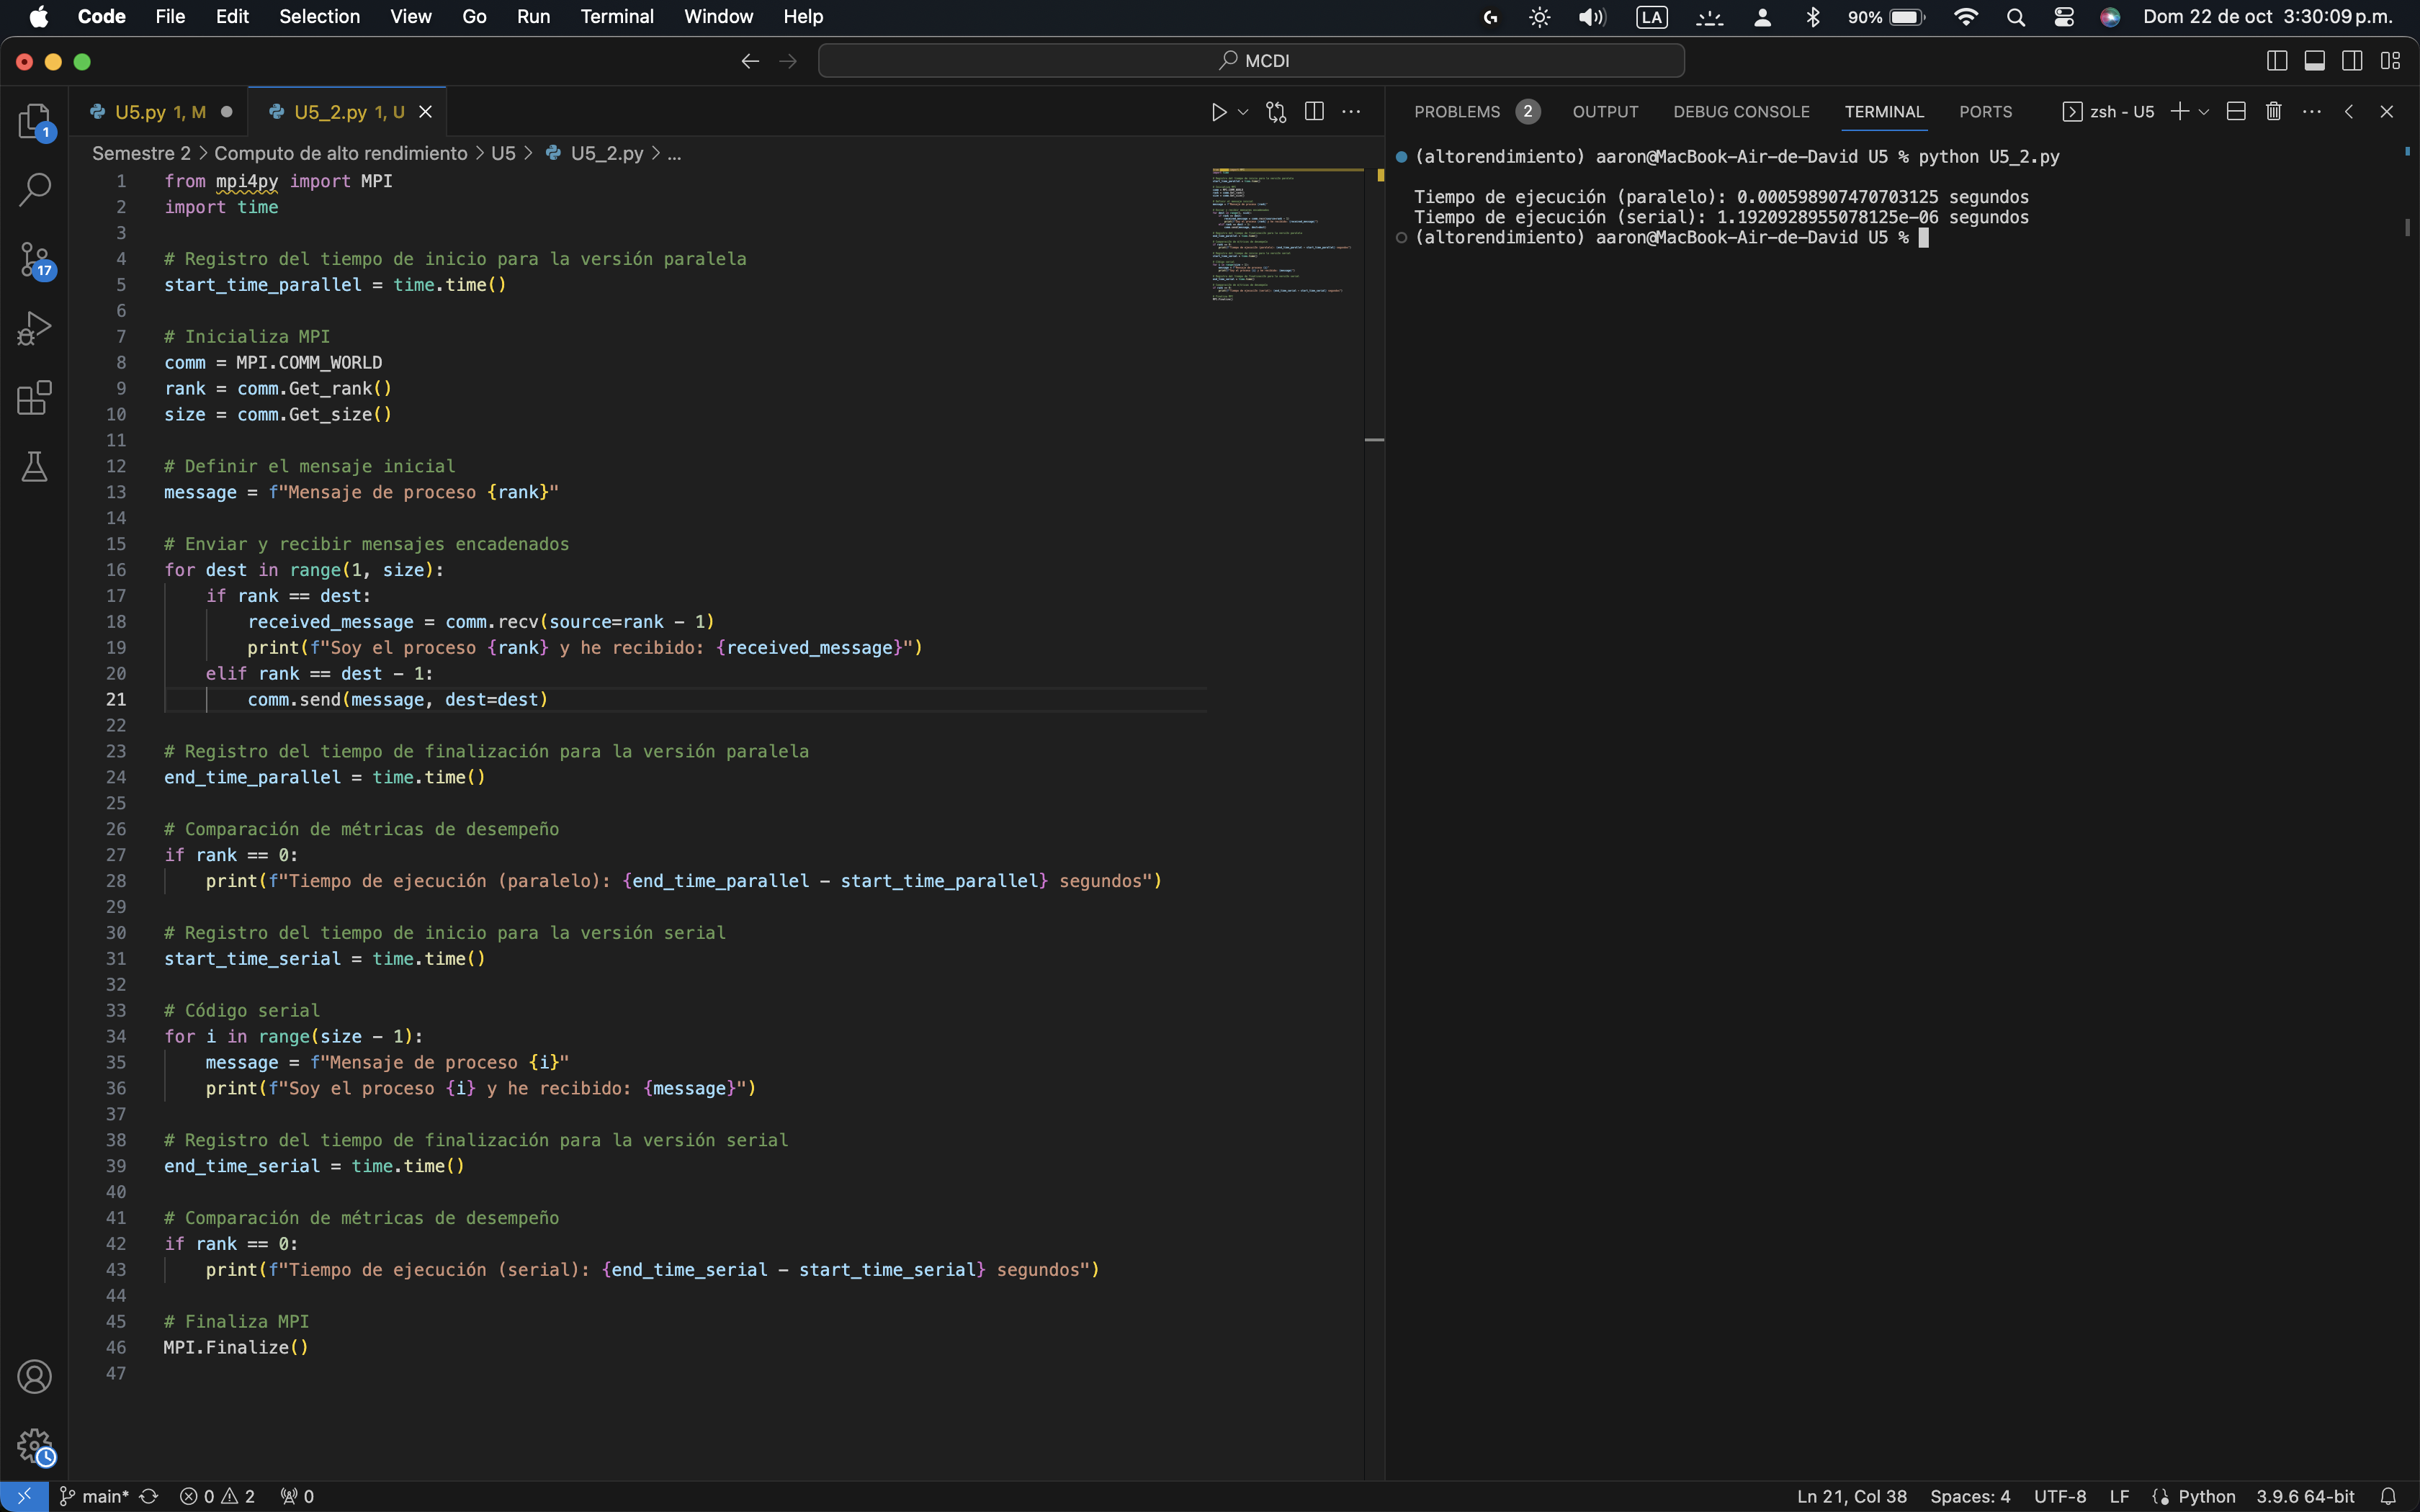

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/Users/aaron/Desktop/2.png')
display(img)

3. **Multiplicación Paralela de Matrices y Vectores con MPI**

In [ ]:
from mpi4py import MPI
import time

# Registro del tiempo de inicio para la versión paralela
start_time_parallel = time.time()

# Inicializa MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Define los vectores de prueba (completos)
vector_a = [1, 2, 3, 4]
vector_b = [5, 6, 7, 8]

# Realiza el producto escalar local
local_result = sum(a * b for a, b in zip(vector_a, vector_b))

# Reduce los resultados locales para obtener el resultado global
global_result = comm.reduce(local_result, op=MPI.SUM, root=0)

# Registro del tiempo de finalización para la versión paralela
end_time_parallel = time.time()

# Comparación de métricas de desempeño
if rank == 0:
    print(f"Resultado del producto escalar (paralelo): {global_result}")
    print(f"Tiempo de ejecución (paralelo): {end_time_parallel - start_time_parallel} segundos")

# Registro del tiempo de inicio para la versión serial
start_time_serial = time.time()

# Código serial
serial_result = sum(a * b for a, b in zip(vector_a, vector_b))

# Registro del tiempo de finalización para la versión serial
end_time_serial = time.time()

# Comparación de métricas de desempeño
if rank == 0:
    print(f"Resultado del producto escalar (serial): {serial_result}")
    print(f"Tiempo de ejecución (serial): {end_time_serial - start_time_serial} segundos")

# Finaliza MPI
MPI.Finalize()

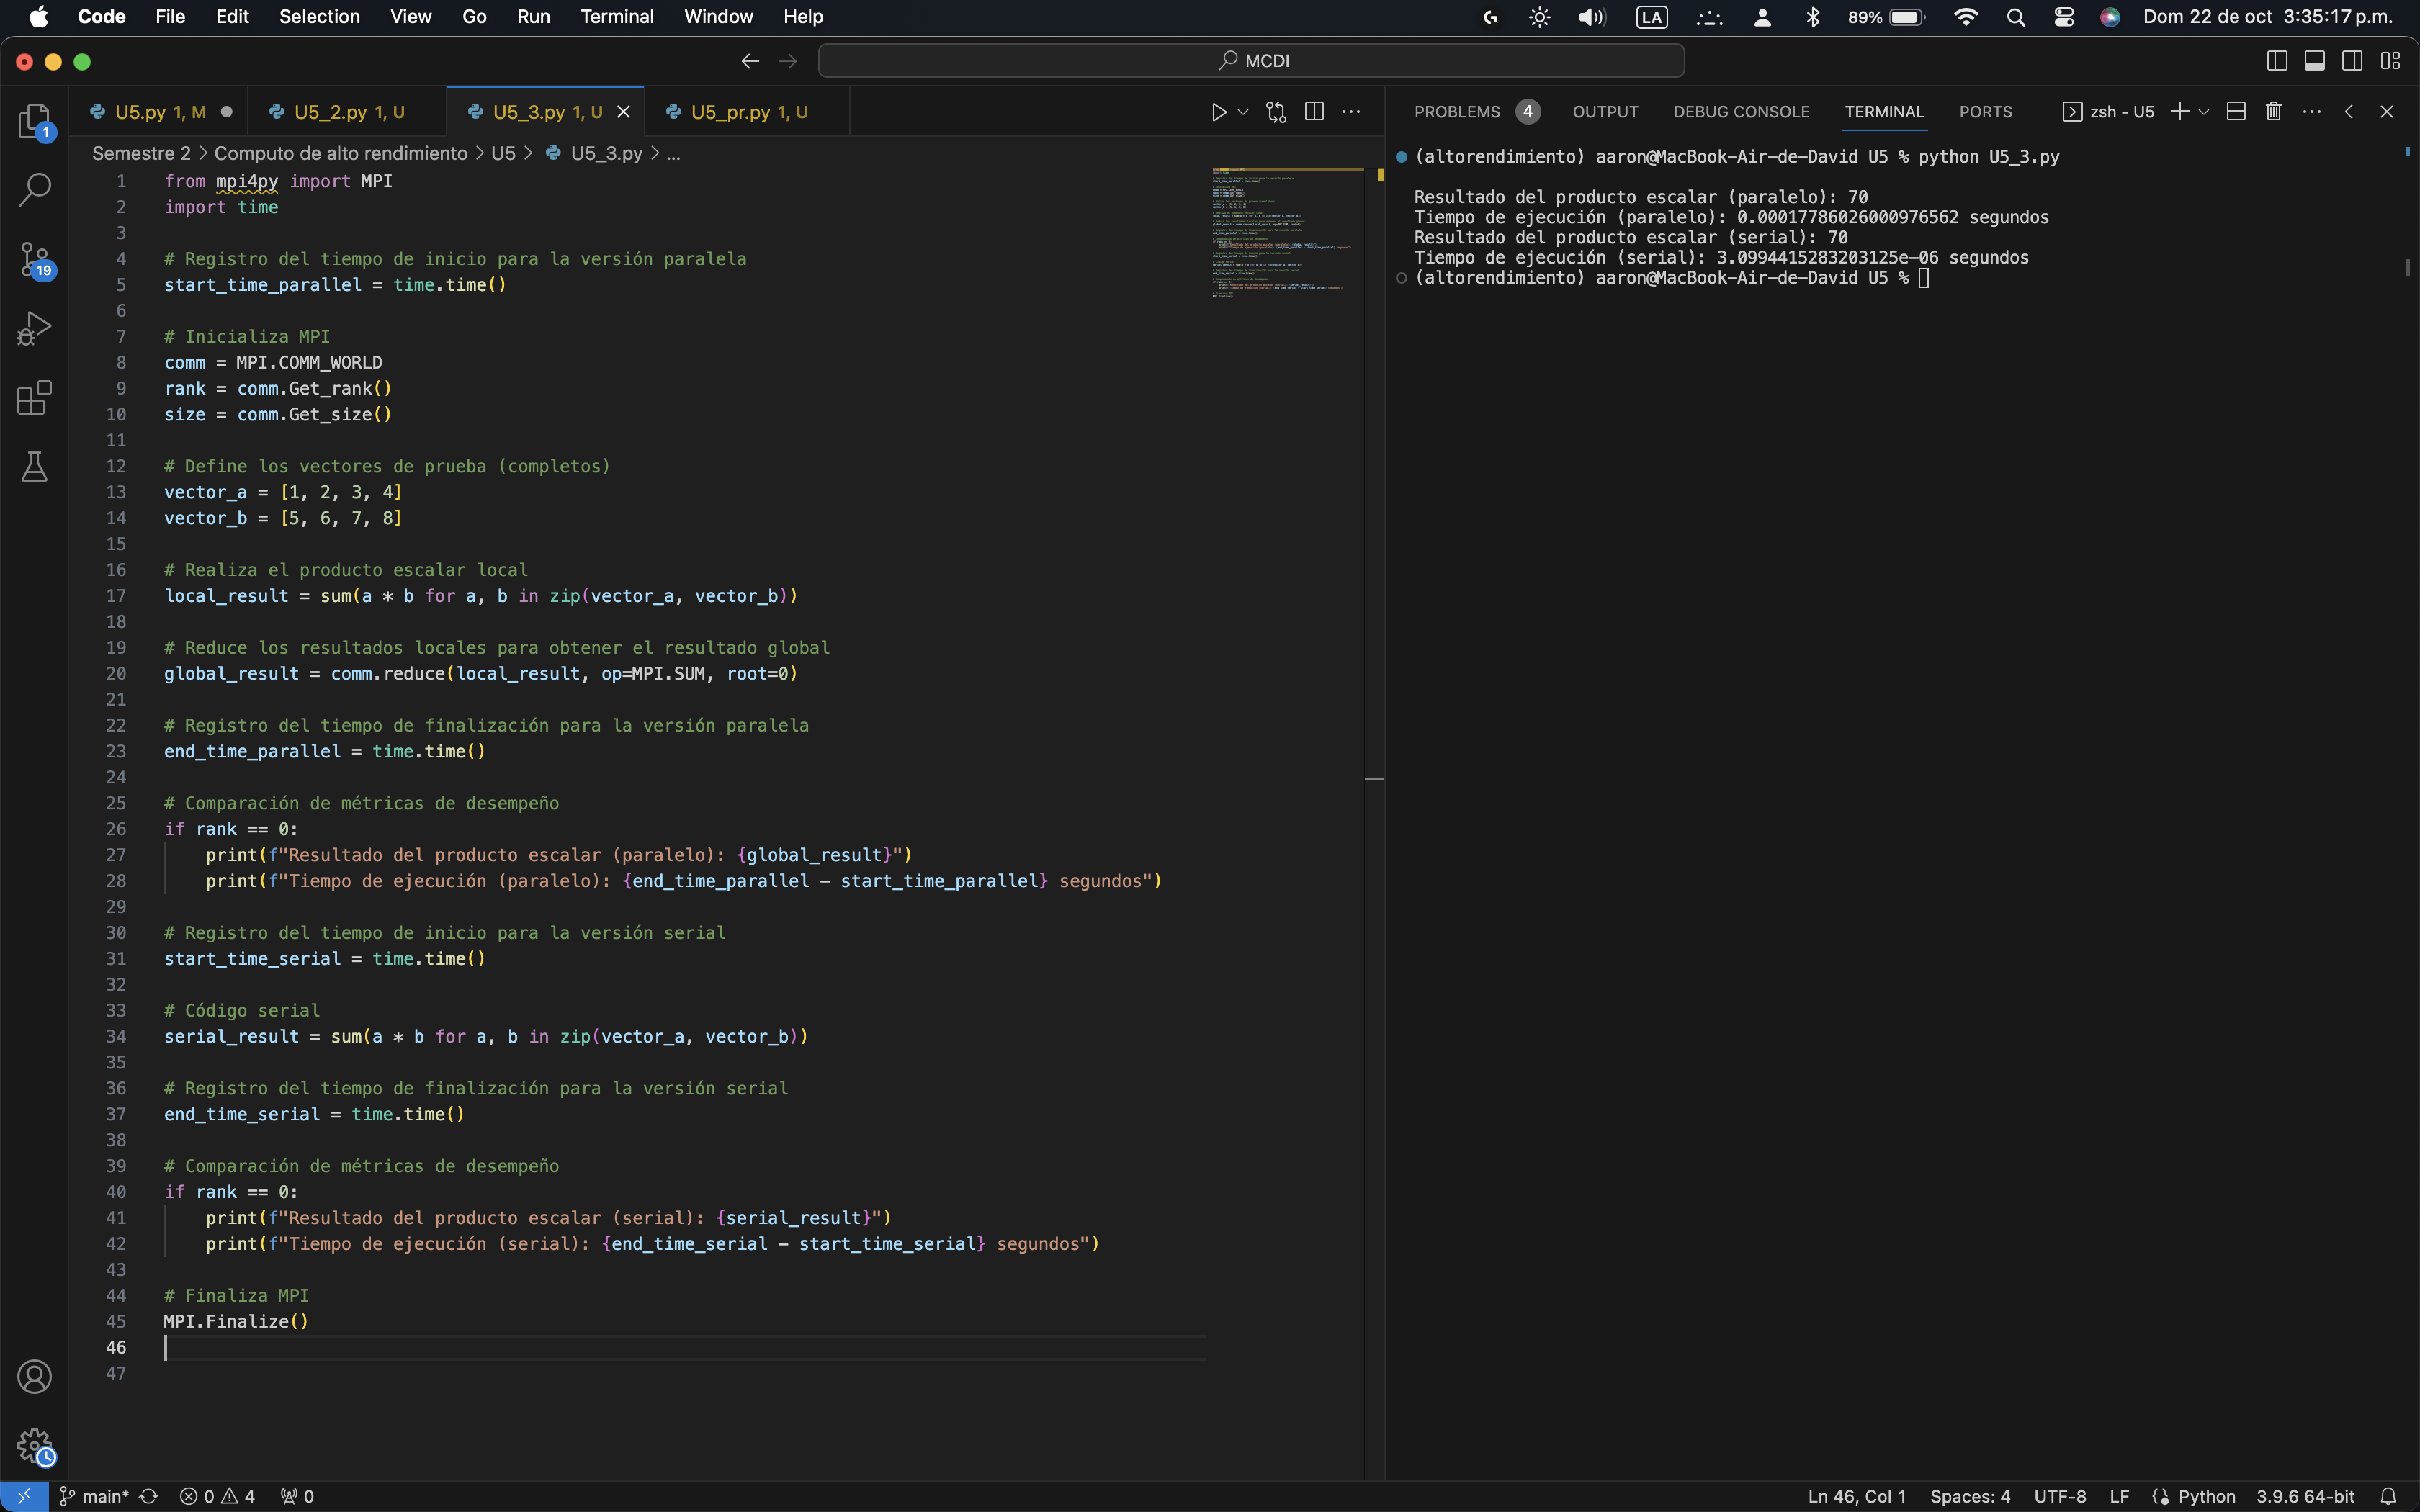

In [14]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/Users/aaron/Desktop/3.png')
display(img)

4. **Multiplicación de una matriz en paralelo**

In [ ]:
from mpi4py import MPI
import time
import numpy as np

# Inicializa MPI
comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

# Definir el tamaño de la matriz
N = size  # Asumiendo que el número de filas de la matriz es igual al número de procesos

# Registro del tiempo de inicio para la versión paralela
start_time_parallel = time.time()

# Generar matriz A y vector x en el proceso 0
if rank == 0:
    matrix_A = np.random.rand(N, N)
    vector_x = np.random.rand(N, 1)
else:
    matrix_A = None
    vector_x = None

# Distribuir la matriz A y difundir el vector x
matrix_A = comm.scatter(matrix_A, root=0)
vector_x = comm.bcast(vector_x, root=0)

# Realizar la multiplicación de matriz-vector local
local_result = np.dot(matrix_A, vector_x)

# Recopilar los resultados locales en el proceso 0
global_result = comm.gather(local_result, root=0)

# Registro del tiempo de finalización para la versión paralela
end_time_parallel = time.time()

# Comparación de métricas de desempeño
if rank == 0:
    result_vector = np.sum(global_result, axis=0)
    print(f"Resultado de la multiplicación (paralelo):")
    print(result_vector)
    print(f"Tiempo de ejecución (paralelo): {end_time_parallel - start_time_parallel} segundos")

# Registro del tiempo de inicio para la versión serial
start_time_serial = time.time()

# Código serial
if rank == 0:
    serial_result = np.dot(matrix_A, vector_x)
else:
    serial_result = None

# Recopilar los resultados locales en el proceso 0 (serial)
serial_result = comm.gather(serial_result, root=0)

# Registro del tiempo de finalización para la versión serial
end_time_serial = time.time()

# Comparación de métricas de desempeño
if rank == 0:
    result_vector = np.sum(serial_result, axis=0)
    print(f"Resultado de la multiplicación (serial):")
    print(result_vector)
    print(f"Tiempo de ejecución (serial): {end_time_serial - start_time_serial} segundos")

# Finaliza MPI
MPI.Finalize()


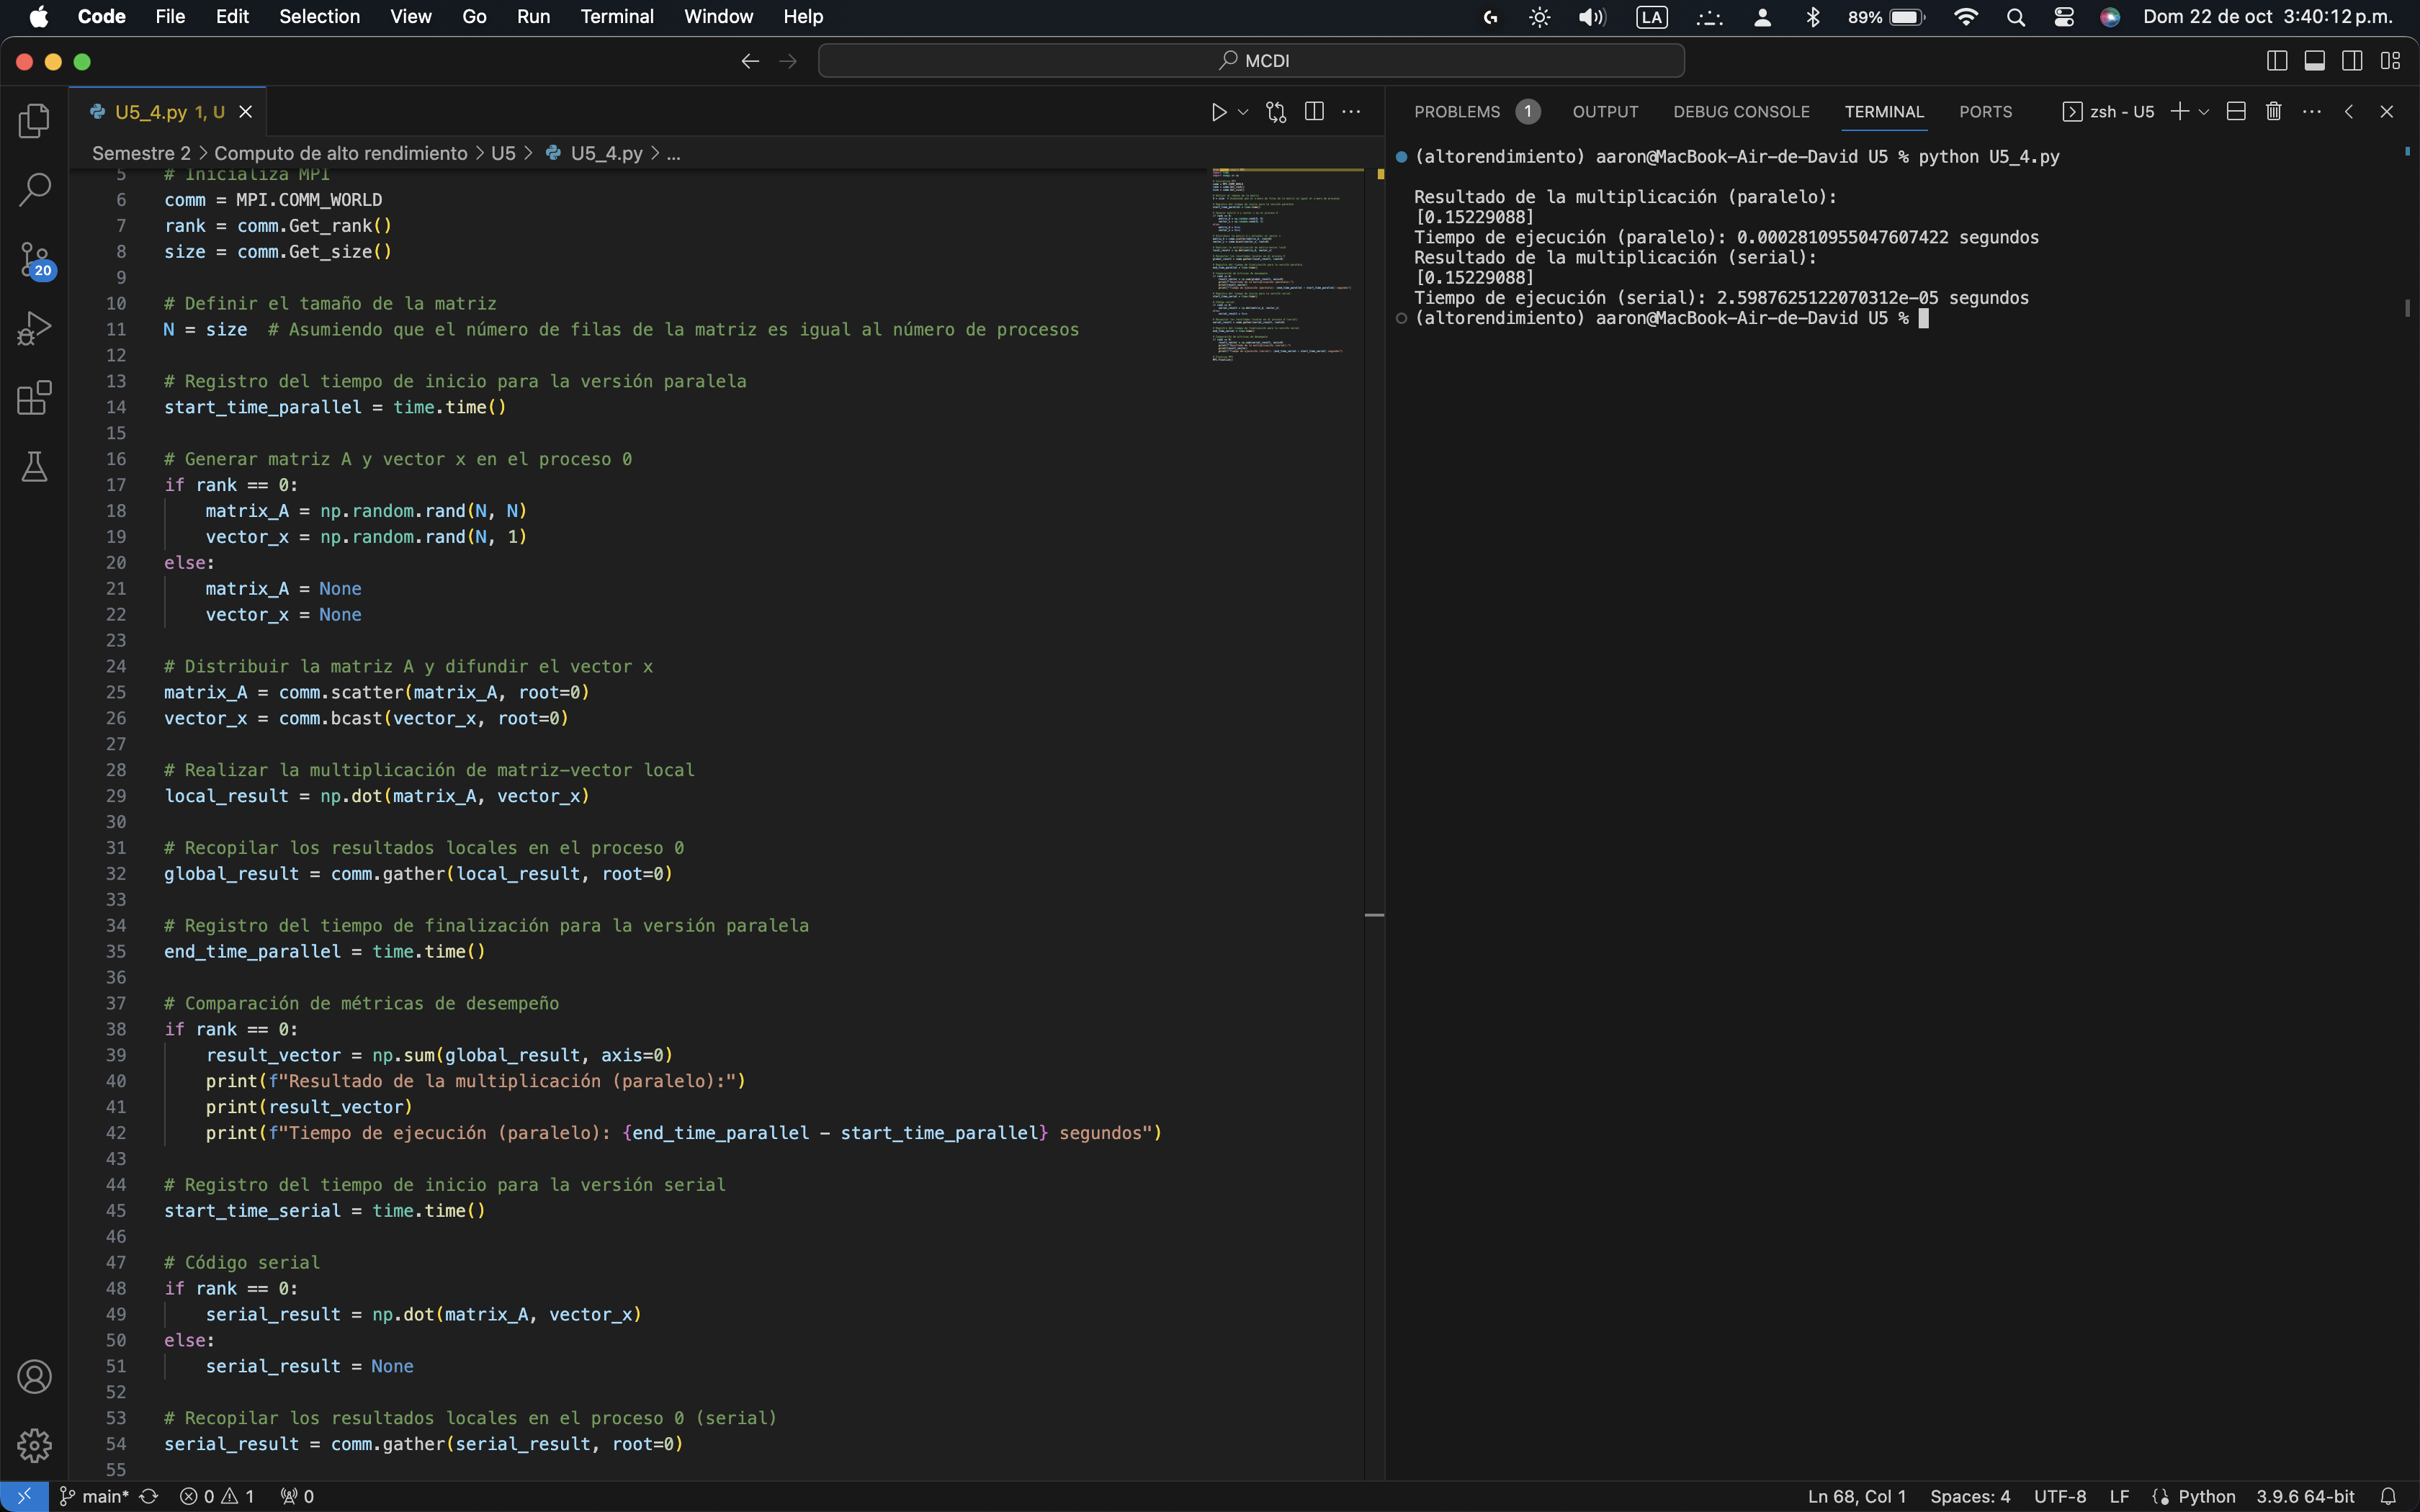

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/Users/aaron/Desktop/4.png')
display(img)

5. **Conteo de Palabras en Archivos de Texto con Map-Reduce**

In [ ]:
### MAP ###

import sys
import re

# Función para dividir una línea en palabras y emitir pares (palabra, 1)
def map_function(line):
    words = re.findall(r'\w+', line)  # Encuentra palabras usando expresiones regulares
    for word in words:
        print(f"{word.lower()}\t1")  # Emitir palabra y 1

# Procesar líneas de entrada
for line in sys.stdin:
    map_function(line)
    
### REDUCE ###

import sys

word_counts = {}

# Función para reducir y contar las palabras
def reduce_function(word, counts):
    if word in word_counts:
        word_counts[word] += int(counts[0])
    else:
        word_counts[word] = int(counts[0])

# Procesar la entrada
for line in sys.stdin:
    word, count = line.strip().split('\t')
    reduce_function(word, [count])

# Imprimir el resultado
for word, count in word_counts.items():
    print(f"{word}\t{count}")

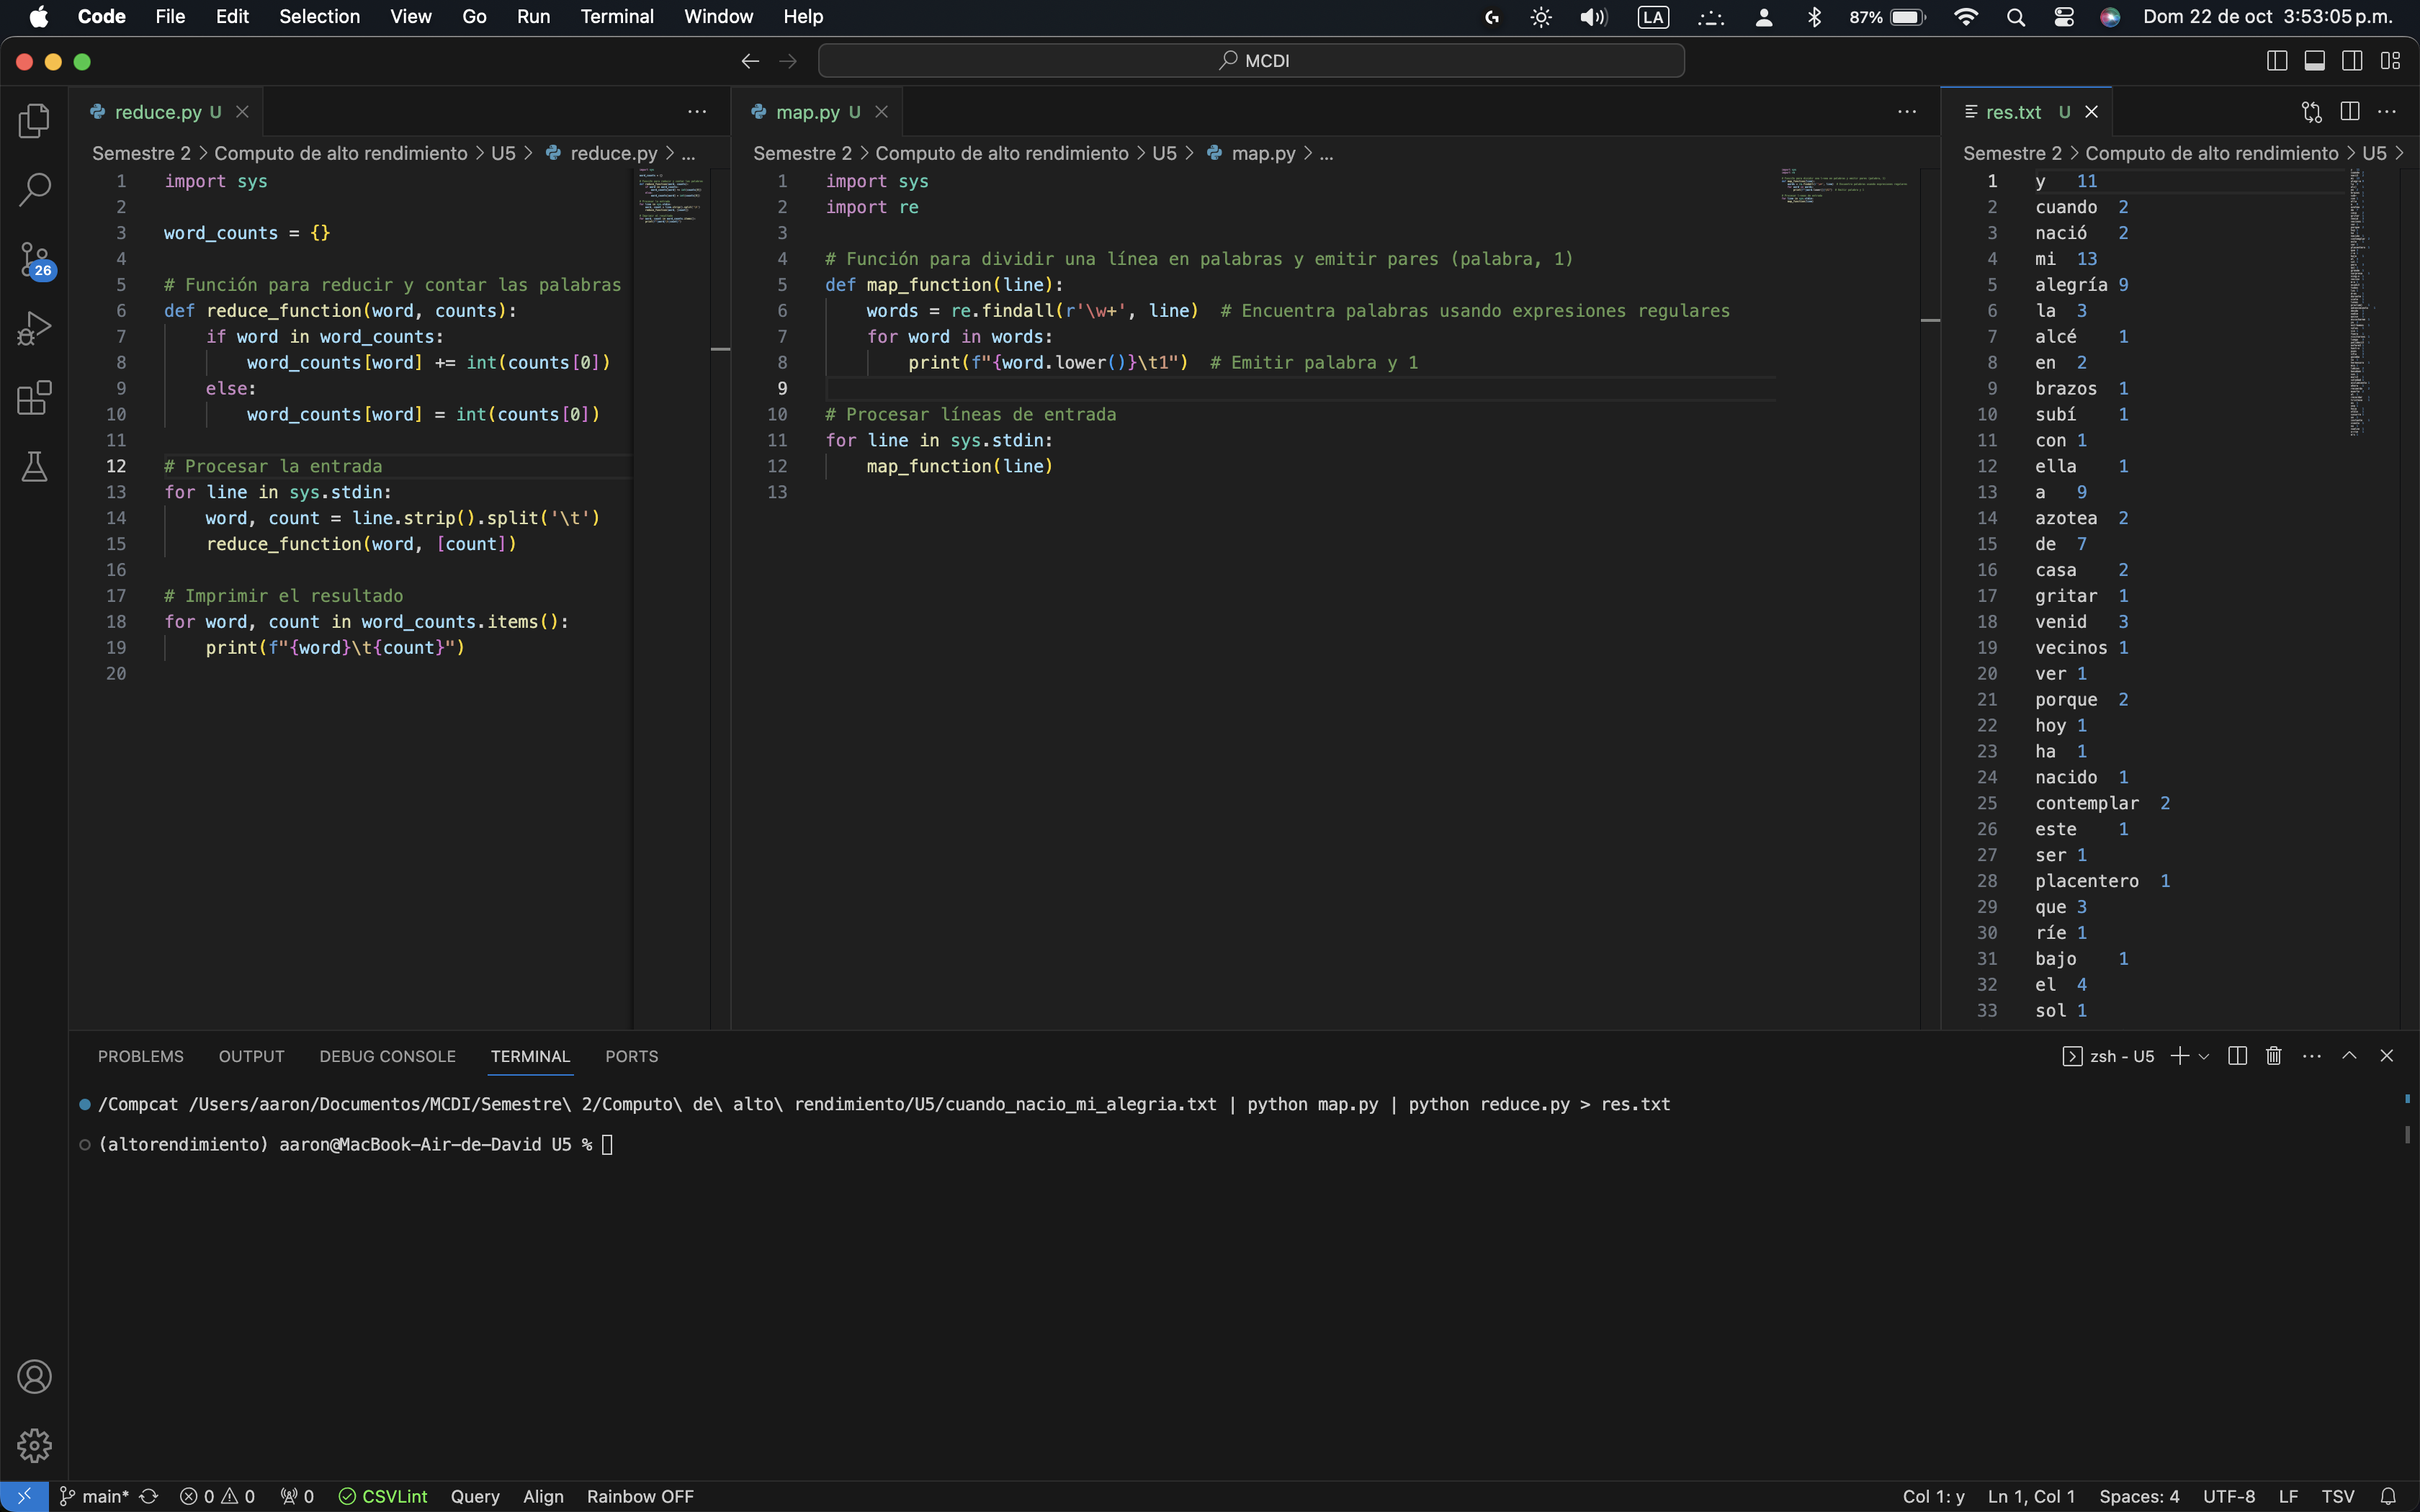

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/Users/aaron/Desktop/5.png')
display(img)

**Conclusión:**

A lo largo de estas actividades, hemos explorado y aplicado conceptos fundamentales de programación paralela con MPI. Hemos aprendido cómo dividir y distribuir tareas entre procesos, realizar cálculos en paralelo y recolectar resultados. Además, hemos aplicado estos conceptos a problemas específicos, como el cálculo de π, la multiplicación de matrices y vectores, y el conteo de palabras en archivos de texto. Este enfoque paralelo permite mejorar el rendimiento y la escalabilidad de las aplicaciones, lo que es esencial en situaciones donde se requiere un alto poder de procesamiento. En resumen, estas actividades nos han proporcionado una introducción práctica a la programación paralela y al paradigma Map-Reduce, y nos han permitido comprender su utilidad en el procesamiento de datos y cálculos intensivos.